In [1]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import warnings
import seaborn as sns
import statsmodels
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

style.use('ggplot')   
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
stockFile = 'data2000_2021.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])#将索引index设置为时间，parse_dates对日期格式处理为标准格式。
stock.head(10)

,open,high,low,close
data,,,,
2000-01-03,11501.85,11522.01,11305.69,11357.51
2000-01-04,11349.75,11350.06,10986.45,10997.94
2000-01-05,10989.37,11215.10,10938.67,11122.66
2000-01-06,11113.37,11313.45,11098.45,11253.27
2000-01-07,11247.06,11528.14,11239.92,11522.56
2000-01-10,11247.06,11638.28,11532.48,11572.20
2000-01-11,11568.47,11663.10,11502.70,11511.09
2000-01-12,11568.47,11612.53,11505.18,11551.11
2000-01-13,11558.24,11656.58,11524.11,11582.44


In [3]:
stock_week = stock['close'].resample('M').mean()
stock_train = stock_week['2000':'2019']

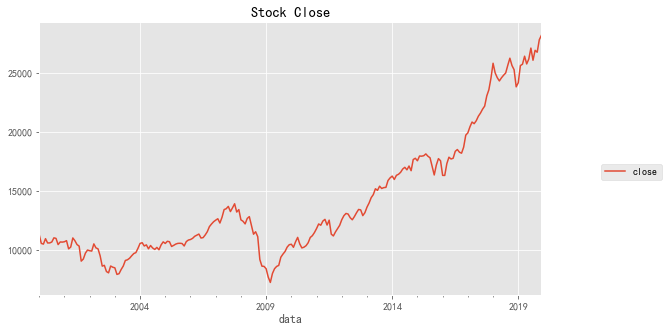

In [5]:
stock_train.plot(figsize=(9,5))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

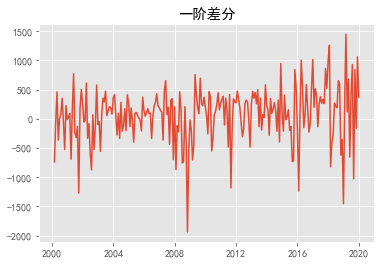

In [20]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()
plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

<ipython-input-21-10649e98f6ce>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


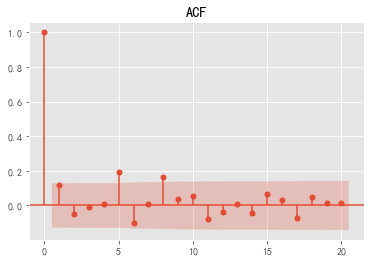

In [21]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

<ipython-input-22-8c0c864cf7a6>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


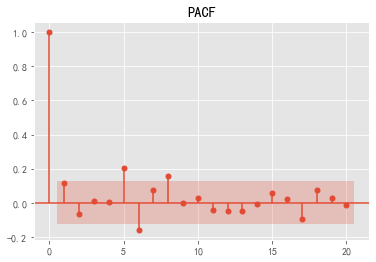

In [22]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

In [23]:
model = statsmodels.tsa.arima_model.ARIMA(stock_train, order=(1, 1, 1),freq='M')

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [24]:
result = model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [25]:
print(result.summary())#统计出ARIMA模型的指标

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  239
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1799.615
Method:                       css-mle   S.D. of innovations            450.635
Date:                Sat, 30 Apr 2022   AIC                           3607.231
Time:                        16:21:28   BIC                           3621.137
Sample:                    02-29-2000   HQIC                          3612.835
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            70.0685     31.509      2.224      0.026       8.312     131.825
ar.L1.D.close    -0.6606      0.131     -5.031      0.000      -0.918      -0.403
ma.L1.D.close     0.7953      0.104     

In [26]:
pred = result.predict('20210406', '20250419',dynamic=True, typ='levels')#预测，指定起始与终止时间。预测值起始时间必须在原始数据中，终止时间不需要
print (pred)

ValueError: could not broadcast input array from shape (0,) into shape (1,)

In [ ]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
# plt.plot(stock_train)#[<matplotlib.lines.Line2D at 0x28025665278>]